In [1]:
# ====================================================
# Introduction: Why do we need to fix `dataset2` (Douban dataset) and clean dataset 1,3?
# I found that the file upload of dataset2 to github is displayed normally, 
# but git clone or directly downloading the zip file results in garbled characters. 
# In order to ensure that every step of the code can be reproduced, 
# I added this code to simulate the reproduction after downloading. 
# This code will also include a comprehensive analysis of the three datasets.
# Data Preprocessing (Data Preprocessing)
# Process dataset1 (Bilibili + Weibo)
# Process dataset2 (Douban, fix encoding issues and standardize column names)
# Process dataset3 (Reddit)
# Ensure the successful generation of dataset1_cleaned.csv, douban_final.csv, and dataset3_cleaned.csv
import pandas as pd
import os
import glob
import chardet

save_dir = r"C:\Users\wusiq\Group1DataAnalysis"

# Step 1: Detect and Fix Encoding Issues for Dataset1 (Bilibili + Weibo)
bilibili_path = os.path.join(save_dir, "dataSet1", "dataset 1", "dataset 1", "bilbil", "bilibili_data_combined_sentiment.csv")
weibo_path = os.path.join(save_dir, "dataSet1", "dataset 1", "dataset 1", "weiboi dataset", "cleaned_sentiment_data.csv")
dataset1_save_path = os.path.join(save_dir, "dataset1_cleaned.csv")

dfs = []

# Function to detect file encoding
def detect_encoding(file_path, sample_size=10000):
    with open(file_path, "rb") as f:
        raw_data = f.read(sample_size)
    result = chardet.detect(raw_data)
    return result['encoding']

# Function to read CSV with detected encoding
def read_csv_with_encoding(path):
    encoding = detect_encoding(path)
    print(f"Detected encoding for {path}: {encoding}")
    try:
        return pd.read_csv(path, encoding=encoding)
    except UnicodeDecodeError:
        print(f"UnicodeDecodeError with {encoding}, trying alternative encodings...")
        for alt_encoding in ["utf-8", "gb18030", "big5", "shift-jis", "latin1"]:
            try:
                return pd.read_csv(path, encoding=alt_encoding)
            except UnicodeDecodeError:
                continue
    print(f"Failed to decode file: {path}")
    return None

# Process Bilibili
try:
    df_bilibili = read_csv_with_encoding(bilibili_path)
    if df_bilibili is not None:
        df_bilibili.rename(columns={'text': 'text', 'time': 'date', 'sentiment': 'sentiment'}, inplace=True)
        df_bilibili['date'] = pd.to_datetime(df_bilibili['date'], errors='coerce')
        df_bilibili.dropna(subset=['text', 'sentiment', 'date'], inplace=True)
        df_bilibili['text'] = df_bilibili['text'].astype(str).apply(lambda x: x.encode('utf-8', 'ignore').decode('utf-8'))
        dfs.append(df_bilibili)
        print("Processed Bilibili dataset")
except Exception as e:
    print(f"Failed to process Bilibili dataset: {e}")

# Process Weibo
try:
    df_weibo = read_csv_with_encoding(weibo_path)
    if df_weibo is not None:
        df_weibo.rename(columns={'评论': 'text', 'Timestamp': 'date', 'Sentiment Score': 'sentiment'}, inplace=True)
        df_weibo['date'] = pd.to_datetime(df_weibo['date'], errors='coerce')
        df_weibo.dropna(subset=['text', 'sentiment', 'date'], inplace=True)
        df_weibo['text'] = df_weibo['text'].astype(str).apply(lambda x: x.encode('utf-8', 'ignore').decode('utf-8'))
        dfs.append(df_weibo)
        print("Processed Weibo dataset")
except Exception as e:
    print(f"Failed to process Weibo dataset: {e}")

# Merge and save dataset1
if dfs:
    merged_df1 = pd.concat(dfs, ignore_index=True)
    merged_df1.to_csv(dataset1_save_path, encoding="utf-8", index=False)
    print(f"Dataset1 cleaned and saved at `{dataset1_save_path}`")
else:
    print("No valid dataset processed for Dataset1")

# Step 2: Fix Encoding Issues in Douban Dataset (dataset2)
douban_files = [f for f in glob.glob(os.path.join(save_dir, "dataset2", "douban_*.csv")) if "_fixed" not in f]

for file_path in douban_files:
    try:
        fixed_path = file_path.replace(".csv", "_fixed.csv")
        if os.path.exists(fixed_path):
            print(f"Skipping already fixed file: {fixed_path}")
            continue

        print(f"Processing: {file_path}")

        with open(file_path, "rb") as f:
            raw_data = f.read()
        decoded_text = raw_data.decode("utf-8", errors="replace")

        with open(fixed_path, "w", encoding="utf-8") as f:
            f.write(decoded_text)

        print(f"Successfully fixed and saved: {fixed_path}")

    except Exception as e:
        print(f"Failed to process {file_path}: {e}")

# Standardize Douban Dataset Columns
fixed_douban_files = glob.glob(os.path.join(save_dir, "dataset2", "douban_*_fixed.csv"))
dfs = []

for file_path in fixed_douban_files:
    try:
        df = pd.read_csv(file_path, encoding="utf-8")

        df.rename(columns={'rating': 'sentiment', 'comment': 'text', 'time': 'date'}, inplace=True)
        df['date'] = pd.to_datetime(df['date'], errors='coerce')

        dfs.append(df)

    except Exception as e:
        print(f"Failed to read {file_path}: {e}")

merged_douban_df = pd.concat(dfs, ignore_index=True)
douban_final_path = os.path.join(save_dir, "dataset2", "douban_final.csv")
merged_douban_df.to_csv(douban_final_path, encoding="utf-8", index=False)
print(f"All Douban datasets cleaned and saved to `{douban_final_path}`")

# Step 3: Process Dataset3 (Reddit)
dataset3_path = os.path.join(save_dir, "dataSet3", "dataset3.csv")
dataset3_save_path = os.path.join(save_dir, "dataset3_cleaned.csv")

try:
    df3 = pd.read_csv(dataset3_path)
    df3.rename(columns={'comment_text': 'text', 'created_utc': 'date'}, inplace=True)
    df3['date'] = pd.to_datetime(df3['date'], errors='coerce')
    df3.dropna(subset=['text', 'sentiment', 'date'], inplace=True)
    df3.to_csv(dataset3_save_path, encoding="utf-8", index=False)
    print(f"Dataset3 cleaned and saved at `{dataset3_save_path}`")
except Exception as e:
    print(f"Failed to process dataset3: {e}")


Detected encoding for C:\Users\wusiq\Group1DataAnalysis\dataSet1\dataset 1\dataset 1\bilbil\bilibili_data_combined_sentiment.csv: UTF-8-SIG
Processed Bilibili dataset
Detected encoding for C:\Users\wusiq\Group1DataAnalysis\dataSet1\dataset 1\dataset 1\weiboi dataset\cleaned_sentiment_data.csv: UTF-8-SIG
Processed Weibo dataset
Dataset1 cleaned and saved at `C:\Users\wusiq\Group1DataAnalysis\dataset1_cleaned.csv`
Skipping already fixed file: C:\Users\wusiq\Group1DataAnalysis\dataset2\douban_comments_attacktitan_season1_fixed.csv
Skipping already fixed file: C:\Users\wusiq\Group1DataAnalysis\dataset2\douban_comments_attacktitan_season2_fixed.csv
Skipping already fixed file: C:\Users\wusiq\Group1DataAnalysis\dataset2\douban_comments_attacktitan_season3_fixed.csv
Skipping already fixed file: C:\Users\wusiq\Group1DataAnalysis\dataset2\douban_comments_ff7_fixed.csv
Skipping already fixed file: C:\Users\wusiq\Group1DataAnalysis\dataset2\douban_comments_nezha_1_fixed.csv
Skipping already fixed

In [39]:
import pandas as pd

# Read the merged dataset (Ensure the correct file path)
file_path = r"C:\Users\wusiq\Group1DataAnalysis\dataset2\douban_final.csv"
df = pd.read_csv(file_path, encoding="utf-8")
# Remove duplicates based on the 'text' column
df_cleaned = df.drop_duplicates(subset=['text'], keep='first')
# Check the size of the data after deduplication
print("The number of rows of data after deduplication:", df_cleaned.shape[0])
# Explicitly define the save path
save_path = r"C:\Users\wusiq\Group1DataAnalysis\dataset2\douban_final.csv"

# Save the cleaned file
df_cleaned.to_csv(save_path, encoding="utf-8", index=False)

# Confirm the file was saved successfully
import os
if os.path.exists(save_path):
    print(f"File saved successfully at: {save_path}")
else:
    print("Error: The file was NOT saved.")


The number of rows of data after deduplication: 7231
File saved successfully at: C:\Users\wusiq\Group1DataAnalysis\dataset2\douban_final.csv


In [3]:
# After the common preprocessing, the dataset 1 appears garbled, and it needs to be reprocessed.
# 1.Why use UTF-8-SIG?
# Our bilibili_data_combined_sentiment.csv and cleaned_sentiment_data.csv are both encoded in UTF-8-SIG. UTF-8-SIG is the UTF-8 version with a BOM (Byte Order Mark), and some software (such as Excel) uses it. When reading and saving directly with utf-8, it may cause garbled characters, so it is mandatory to read and save with UTF-8-SIG.
# 2.Why explicitly convert the text column to a string?
# Sometimes pandas wrongly parses the text column as a float, resulting in NaN values. 
# Explicitly converting text to str ensures that the text is not misparsed.
# 3.Why delete the NaN data rows first?
# Only rows where text, sentiment, and date all have values are useful. dropna(subset=['text','sentiment', 'date']) ensures the data is complete.
# 4.Why rename(columns={...})?
# The column names of different data sets are not unified:
# Bilibili: text, time, sentiment
# Weibo: 评论, Timestamp, Sentiment Score
# Unifying them into text, date, sentiment is convenient for subsequent analysis.


import pandas as pd
import os

save_dir = r"C:\Users\wusiq\Group1DataAnalysis"
bilibili_path = os.path.join(save_dir, "dataSet1", "dataset 1", "dataset 1", "bilbil", "bilibili_data_combined_sentiment.csv")
weibo_path = os.path.join(save_dir, "dataSet1", "dataset 1", "dataset 1", "weiboi dataset", "cleaned_sentiment_data.csv")
dataset1_save_path = os.path.join(save_dir, "dataset1_cleaned.csv")

dfs = []

# Function to read CSV with UTF-8-SIG encoding
def read_utf8_sig(path):
    return pd.read_csv(path, encoding="utf-8-sig")

# Process Bilibili
try:
    df_bilibili = read_utf8_sig(bilibili_path)
    df_bilibili.rename(columns={'text': 'text', 'time': 'date', 'sentiment': 'sentiment'}, inplace=True)
    df_bilibili['date'] = pd.to_datetime(df_bilibili['date'], errors='coerce')
    df_bilibili.dropna(subset=['text', 'sentiment', 'date'], inplace=True)
    df_bilibili['text'] = df_bilibili['text'].astype(str)
    dfs.append(df_bilibili)
    print("Processed Bilibili dataset")
except Exception as e:
    print(f"Failed to process Bilibili dataset: {e}")

# Process Weibo
try:
    df_weibo = read_utf8_sig(weibo_path)
    df_weibo.rename(columns={'评论': 'text', 'Timestamp': 'date', 'Sentiment Score': 'sentiment'}, inplace=True)
    df_weibo['date'] = pd.to_datetime(df_weibo['date'], errors='coerce')
    df_weibo.dropna(subset=['text', 'sentiment', 'date'], inplace=True)
    df_weibo['text'] = df_weibo['text'].astype(str)
    dfs.append(df_weibo)
    print("Processed Weibo dataset")
except Exception as e:
    print(f"Failed to process Weibo dataset: {e}")

# Merge and save dataset1 with UTF-8-SIG encoding
if dfs:
    merged_df1 = pd.concat(dfs, ignore_index=True)
    merged_df1.to_csv(dataset1_save_path, encoding="utf-8-sig", index=False)
    print(f"Dataset1 cleaned and saved at `{dataset1_save_path}`")
else:
    print("No valid dataset processed for Dataset1")


Processed Bilibili dataset
Processed Weibo dataset
Dataset1 cleaned and saved at `C:\Users\wusiq\Group1DataAnalysis\dataset1_cleaned.csv`


In [41]:
# Because the dataset 2 does not have sentiment, add a bit of analysis.
import pandas as pd
from snownlp import SnowNLP


# Load the dataset
file_path = r"C:\Users\wusiq\Group1DataAnalysis\dataset2\douban_final.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# Ensure 'text' column exists
if "text" not in df.columns:
    raise KeyError("The dataset does not contain a 'text' column.")

# Compute Sentiment Scores
def compute_sentiment(text):
    """Compute sentiment score using SnowNLP and scale it from [0,1] to [-1,1]."""
    if pd.isna(text) or text.strip() == "":
        return None  # Return None for missing or empty text
    s = SnowNLP(str(text)).sentiments  # Get sentiment score (0 to 1)
    return (s - 0.5) * 2  # Scale to -1 to 1

df["sentiment"] = df["text"].apply(compute_sentiment)

#  Save the Processed Dataset
save_path = r"C:\Users\wusiq\Group1DataAnalysis\dataset2\douban_final.csv"
df.to_csv(save_path, encoding="utf-8-sig", index=False)

print(f"Sentiment analysis completed. The processed file is saved at: {save_path}")


Sentiment analysis completed. The processed file is saved at: C:\Users\wusiq\Group1DataAnalysis\dataset2\douban_final.csv


Successfully merged 3 datasets into: C:\Users\wusiq\Group1DataAnalysis\final_merged_dataset.csv
Sentiment values have been properly normalized to [-1,1].

Dataset distribution by period:
period
Post-Pandemic    65863
Pre-Pandemic     20608
Name: count, dtype: int64
                 count      mean       std  min       25%       50%       75%  \
period                                                                          
Post-Pandemic  65863.0 -0.590211  0.273321 -1.0 -0.682312 -0.673631 -0.472057   
Pre-Pandemic   20608.0 -0.414878  0.483664 -1.0 -0.682312 -0.560782 -0.366340   

               max  
period              
Post-Pandemic  1.0  
Pre-Pandemic   1.0  
Sampled 20608 records from each period for comparison.


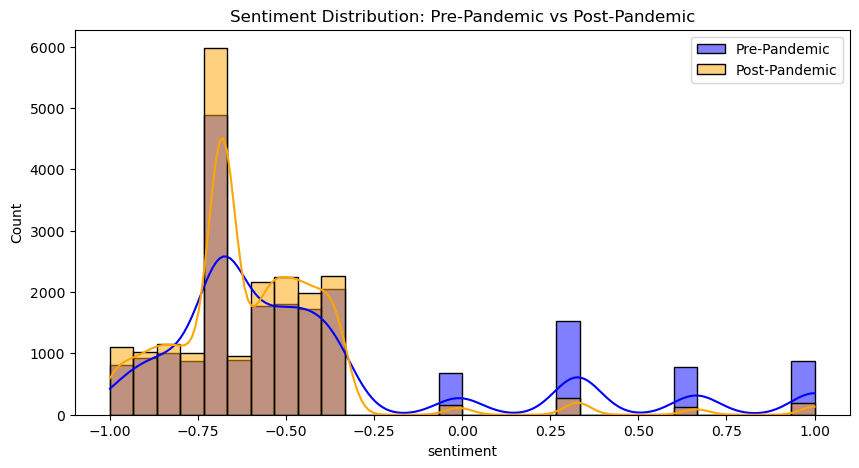


T-Test for Sentiment Score Change (Sampled Data):
T-statistic = -44.243946486743376, p-value = 0.0
Reject H₀: Sentiment scores have significantly changed post-pandemic.
Final processed dataset saved at: C:\Users\wusiq\Group1DataAnalysis\dataset2\final_processed_dataset.csv


In [61]:
# Read three CSV files and keep only the key columns (sentiment, text, date). 
# Use concat() to merge the data and create final_merged_dataset.csv
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# ================================
# Step 1: Load and Merge Three Datasets
# ================================

# Define file paths for the three datasets
file1 = r"C:\Users\wusiq\Group1DataAnalysis\dataset1_cleaned.csv"
file2 = r"C:\Users\wusiq\Group1DataAnalysis\dataset3_cleaned.csv"
file3 = r"C:\Users\wusiq\Group1DataAnalysis\dataset2\douban_finalclean.csv"

# Load datasets and explicitly select required columns (excluding 'votes' if present)
df1 = pd.read_csv(file1, encoding="utf-8", usecols=["sentiment", "text", "date"])
df2 = pd.read_csv(file2, encoding="utf-8", usecols=["sentiment", "text", "date"])
df3 = pd.read_csv(file3, encoding="utf-8", usecols=["sentiment", "text", "date"])  # Ensure 'votes' is not included

# Merge datasets
df = pd.concat([df1, df2, df3], ignore_index=True)

# Save the merged dataset for reproducibility
merged_file_path = r"C:\Users\wusiq\Group1DataAnalysis\final_merged_dataset.csv"
df.to_csv(merged_file_path, encoding="utf-8-sig", index=False)

print(f"Successfully merged 3 datasets into: {merged_file_path}")

# ================================
# Step 2: Ensure Sentiment Scores Are Numeric & Remove Missing Data
# ================================

# Convert 'sentiment' to numeric
df["sentiment"] = pd.to_numeric(df["sentiment"], errors="coerce")

# Drop rows with missing sentiment scores
df = df.dropna(subset=["sentiment"])

# Convert 'date' column to datetime format
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Drop rows with missing or invalid dates
df = df.dropna(subset=["date"])

# ================================
# Step 3: Normalize Sentiment Scores to [-1,1]
# ================================

# Compute min and max values excluding outliers (1% - 99% quantiles)
min_sent = df["sentiment"].quantile(0.01)  # Remove extreme bottom 1%
max_sent = df["sentiment"].quantile(0.99)  # Remove extreme top 1%

# Apply Min-Max Normalization to scale sentiment to [-1,1]
df["sentiment"] = 2 * ((df["sentiment"] - min_sent) / (max_sent - min_sent)) - 1

# Clip values to ensure they remain in the [-1,1] range
df["sentiment"] = df["sentiment"].clip(-1, 1)

print("Sentiment values have been properly normalized to [-1,1].")

# ================================
# Step 4: Categorize Data into Pre- and Post-Pandemic Groups
# ================================

# Define the pandemic cutoff date (Dec 30, 2019)
df["period"] = df["date"].apply(lambda x: "Pre-Pandemic" if x < pd.Timestamp("2019-12-30") else "Post-Pandemic")

# Check if categorization is correct
print("\nDataset distribution by period:")
print(df["period"].value_counts())
print(df.groupby("period")["sentiment"].describe())

# ================================
# Step 5: Balance Sample Sizes for Fair Comparison
# ================================

# Ensure equal sample sizes for both groups
pre_pandemic_count = df[df["period"] == "Pre-Pandemic"].shape[0]
post_pandemic_count = df[df["period"] == "Post-Pandemic"].shape[0]

# Define sample size based on the smallest group
sample_size = min(pre_pandemic_count, post_pandemic_count)

# Randomly sample equal-sized datasets
pre_pandemic_sampled = df[df["period"] == "Pre-Pandemic"]["sentiment"].sample(n=sample_size, random_state=42)
post_pandemic_sampled = df[df["period"] == "Post-Pandemic"]["sentiment"].sample(n=sample_size, random_state=42)

print(f"Sampled {sample_size} records from each period for comparison.")

# ================================
# Step 6: Visualize Sentiment Distributions
# ================================

plt.figure(figsize=(10, 5))
sns.histplot(pre_pandemic_sampled, kde=True, label="Pre-Pandemic", color="blue", bins=30)
sns.histplot(post_pandemic_sampled, kde=True, label="Post-Pandemic", color="orange", bins=30)
plt.legend()
plt.title("Sentiment Distribution: Pre-Pandemic vs Post-Pandemic")
plt.show()

# ================================
# Step 7: Conduct T-Test for Sentiment Change
# ================================

# Perform Independent T-Test assuming unequal variances
t_stat, p_t = ttest_ind(post_pandemic_sampled, pre_pandemic_sampled, equal_var=False)

# Print results
print("\nT-Test for Sentiment Score Change (Sampled Data):")
print(f"T-statistic = {t_stat}, p-value = {p_t}")

if p_t < 0.05:
    print("Reject H₀: Sentiment scores have significantly changed post-pandemic.")
else:
    print("Fail to Reject H₀: No significant change in sentiment scores post-pandemic.")

# ================================
# Step 8: Save Final Processed Data for Reproducibility
# ================================

processed_file_path = r"C:\Users\wusiq\Group1DataAnalysis\dataset2\final_processed_dataset.csv"
df.to_csv(processed_file_path, encoding="utf-8-sig", index=False)
print(f"Final processed dataset saved at: {processed_file_path}")


In [65]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu, chi2_contingency

# ================================
# Step 1: Load and Prepare Data
# ================================
print("Loading dataset and preparing data...")

# Load the merged dataset
file_path = r"C:\Users\wusiq\Group1DataAnalysis\final_merged_dataset.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# Display the first few rows to verify dataset structure
print("\nFirst few rows of the dataset:")
print(df.head())

# Ensure 'sentiment' is numeric
df["sentiment"] = pd.to_numeric(df["sentiment"], errors="coerce")

# Drop rows with missing sentiment values
df = df.dropna(subset=["sentiment"])

# Ensure 'date' column is in datetime format
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Drop rows with invalid dates (if any)
df = df.dropna(subset=["date"])

print("\nData loaded and cleaned successfully.")

# ================================
# Step 2: Categorize Data (Pre-Pandemic vs. Post-Pandemic)
# ================================
print("\nCategorizing data into 'Pre-Pandemic' and 'Post-Pandemic'...")

# Define pandemic start date
pandemic_start = pd.Timestamp("2019-12-30")

# Assign periods based on date
df["period"] = df["date"].apply(lambda x: "Pre-Pandemic" if x < pandemic_start else "Post-Pandemic")

# Verify categorization
print("\nDistribution of data by period:")
print(df["period"].value_counts())

# ================================
# Step 3: Ensure Balanced Sampling for Fair Comparison
# ================================
print("\nBalancing the dataset to ensure equal sample sizes...")

# Count the number of records in each period
pre_pandemic_count = df[df["period"] == "Pre-Pandemic"].shape[0]
post_pandemic_count = df[df["period"] == "Post-Pandemic"].shape[0]

# Define the sample size as the minimum available data
sample_size = min(pre_pandemic_count, post_pandemic_count)

# Randomly sample equal-sized datasets
pre_pandemic_sampled = df[df["period"] == "Pre-Pandemic"]["sentiment"].sample(n=sample_size, random_state=42)
post_pandemic_sampled = df[df["period"] == "Post-Pandemic"]["sentiment"].sample(n=sample_size, random_state=42)

print(f"Sampled {sample_size} records from each period for comparison.")

# ================================
# Step 4: Mann-Whitney U Test (Non-Parametric)
# ================================
print("\nConducting Mann-Whitney U Test (suitable for non-normal distributions)...")

# Perform Mann-Whitney U test
stat_h0, p_h0 = mannwhitneyu(pre_pandemic_sampled, post_pandemic_sampled, alternative="two-sided")

# Print results
print("\nMann-Whitney U Test for Sentiment Score Change:")
print(f"U-statistic = {stat_h0}, p-value = {p_h0}")

if p_h0 < 0.05:
    print("Reject H₀: Sentiment scores have significantly changed post-pandemic.")
else:
    print("Fail to Reject H₀: No significant change in sentiment scores post-pandemic.")

# ================================
# Step 5: Chi-Square Test for Extreme Positive Sentiment
# ================================
print("\nConducting Chi-Square Test to detect extreme positive sentiment shifts...")

# Define threshold for extreme positive sentiment (top 5% of data)
threshold = df["sentiment"].quantile(0.95)

# Count occurrences of extreme positive sentiment
pre_extreme = np.sum(pre_pandemic_sampled > threshold)
post_extreme = np.sum(post_pandemic_sampled > threshold)

# Create contingency table
contingency_table = np.array([
    [pre_extreme, len(pre_pandemic_sampled) - pre_extreme],
    [post_extreme, len(post_pandemic_sampled) - post_extreme]
])

# Perform Chi-Square Test
chi2_stat, p_chi2, dof, expected = chi2_contingency(contingency_table)

# Print results
print("\nChi-Square Test for Extreme Positive Sentiment Increase:")
print(f"Chi-Square Statistic = {chi2_stat}, p-value = {p_chi2}")

if p_chi2 < 0.05:
    print("Reject H₀: The proportion of extreme positive sentiment has significantly increased post-pandemic.")
else:
    print("Fail to Reject H₀: No significant increase in extreme positive sentiment post-pandemic.")

# ================================
# Step 6: Save Processed Data for Reproducibility
# ================================
processed_file_path = r"C:\Users\wusiq\Group1DataAnalysis\dataset2\final_processed_dataset.csv"
df.to_csv(processed_file_path, encoding="utf-8-sig", index=False)

print(f"\nFinal processed dataset saved at: {processed_file_path}")
print("\nAnalysis complete! All steps successfully executed.")


Loading dataset and preparing data...

First few rows of the dataset:
                                                text                 date  \
0                                        [热词系列_知识增加]  2021-02-10 06:46:24   
1  申公豹，缩影映射\n这部电影的剧情便是一个理智的东西，哪吒闹海错了知道去补就，申公豹知道自己...  2025-02-21 15:40:42   
2                                                申公公  2020-04-21 08:26:06   
3                                              投币！！！  2025-02-21 14:52:10   
4                                                Ծ‸Ծ  2025-02-10 21:42:52   

            sentiment  
0  0.9275508295844151  
1  0.9999966176990892  
2  0.6774921075767265  
3  0.1897063474929162  
4                 0.5  

Data loaded and cleaned successfully.

Categorizing data into 'Pre-Pandemic' and 'Post-Pandemic'...

Distribution of data by period:
period
Post-Pandemic    65863
Pre-Pandemic     20608
Name: count, dtype: int64

Balancing the dataset to ensure equal sample sizes...
Sampled 20608 records from each period for comparison.


In [66]:
import pandas as pd
import numpy as np

# ================================
# Step 1: Load and Prepare Data
# ================================
print("Loading dataset and preparing data...")

# Load dataset
file_path = r"C:\Users\wusiq\Group1DataAnalysis\final_merged_dataset.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# Convert 'sentiment' column to numeric
df["sentiment"] = pd.to_numeric(df["sentiment"], errors="coerce")

# Drop rows with missing values in 'sentiment'
df = df.dropna(subset=["sentiment"])

# Convert 'date' column to datetime format
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Drop rows with invalid dates
df = df.dropna(subset=["date"])

print("\nData loaded and cleaned successfully.")

# ================================
# Step 2: Categorize Data (Pre-Pandemic vs. Post-Pandemic)
# ================================
print("\nCategorizing data into 'Pre-Pandemic' and 'Post-Pandemic'...")

# Define pandemic start date
pandemic_start = pd.Timestamp("2019-12-30")

# Create 'period' column
df["period"] = df["date"].apply(lambda x: "Pre-Pandemic" if x < pandemic_start else "Post-Pandemic")

# Verify categorization
print("\nDistribution of data by period:")
print(df["period"].value_counts())

# ================================
# Step 3: Ensure Balanced Sampling
# ================================
print("\nBalancing the dataset to ensure equal sample sizes...")

# Count records in each period
pre_pandemic_count = df[df["period"] == "Pre-Pandemic"].shape[0]
post_pandemic_count = df[df["period"] == "Post-Pandemic"].shape[0]

# Define sample size
sample_size = min(pre_pandemic_count, post_pandemic_count)

# Random sampling
pre_pandemic_sampled = df[df["period"] == "Pre-Pandemic"]["sentiment"].sample(n=sample_size, random_state=42)
post_pandemic_sampled = df[df["period"] == "Post-Pandemic"]["sentiment"].sample(n=sample_size, random_state=42)

print(f"Sampled {sample_size} records from each period for comparison.")

# ================================
# Step 4: Compute Cliff’s Delta
# ================================
print("\nComputing Approximate Cliff’s Delta...")

def cliffs_delta_approx(x, y, sample_size=10000):
    """
    Approximate Cliff’s Delta by random sampling from both distributions.
    - Uses NumPy for efficient computation.
    - Handles cases where dataset is smaller than sample size.
    """
    x = np.array(x)
    y = np.array(y)

    # Adjust sample size if datasets are small
    sample_size = min(sample_size, len(x), len(y))
    
    # Random sampling
    x_sample = np.random.choice(x, size=sample_size, replace=False)
    y_sample = np.random.choice(y, size=sample_size, replace=False)

    # Compute pairwise comparisons
    diff_matrix = np.sign(x_sample[:, None] - y_sample)  # Difference matrix
    delta_value = np.sum(diff_matrix) / (sample_size ** 2)  # Normalize

    return delta_value

# Compute Approximate Cliff’s Delta
delta_value_approx = cliffs_delta_approx(pre_pandemic_sampled, post_pandemic_sampled)
print(f"Approximate Cliff’s Delta for Sentiment Score Distribution (After Sampling): {delta_value_approx:.3f}")

# ================================
# Step 5: Save Processed Data
# ================================
processed_file_path = r"C:\Users\wusiq\Group1DataAnalysis\dataset2\final_processed_dataset.csv"
df.to_csv(processed_file_path, encoding="utf-8-sig", index=False)

print(f"\nFinal processed dataset saved at: {processed_file_path}")
print("\nAnalysis complete! All steps successfully executed.")


Loading dataset and preparing data...

Data loaded and cleaned successfully.

Categorizing data into 'Pre-Pandemic' and 'Post-Pandemic'...

Distribution of data by period:
period
Post-Pandemic    65863
Pre-Pandemic     20608
Name: count, dtype: int64

Balancing the dataset to ensure equal sample sizes...
Sampled 20608 records from each period for comparison.

Computing Approximate Cliff’s Delta...
Approximate Cliff’s Delta for Sentiment Score Distribution (After Sampling): 0.165

Final processed dataset saved at: C:\Users\wusiq\Group1DataAnalysis\dataset2\final_processed_dataset.csv

Analysis complete! All steps successfully executed.


Loading dataset...

Checking sentiment range before normalization:
count    86472.000000
mean         0.397667
std          1.022295
min         -0.999800
25%          0.000000
50%          0.128000
75%          0.680800
max          5.000000
Name: sentiment, dtype: float64

Sentiment values are outside [-1,1]. Normalizing to [-1,1]...

Sentiment values have been normalized to [-1,1].
count    86472.000000
mean        -0.534162
std          0.340776
min         -1.000000
25%         -0.666722
50%         -0.624054
75%         -0.439781
max          1.000000
Name: sentiment, dtype: float64
Sampled 20608 records from each period for fair comparison.


<Figure size 1200x600 with 0 Axes>

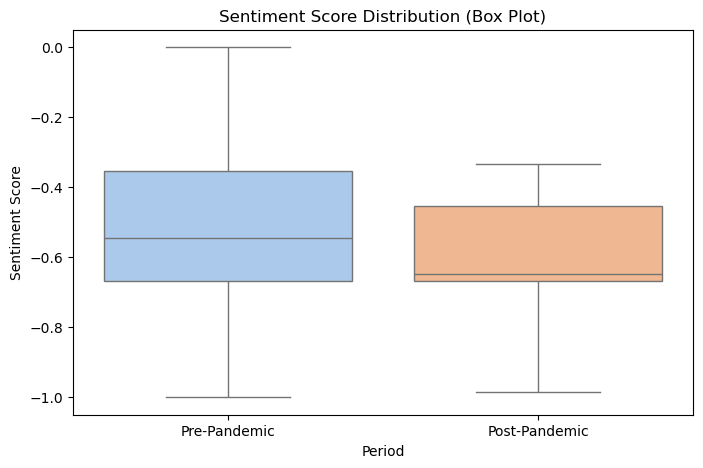

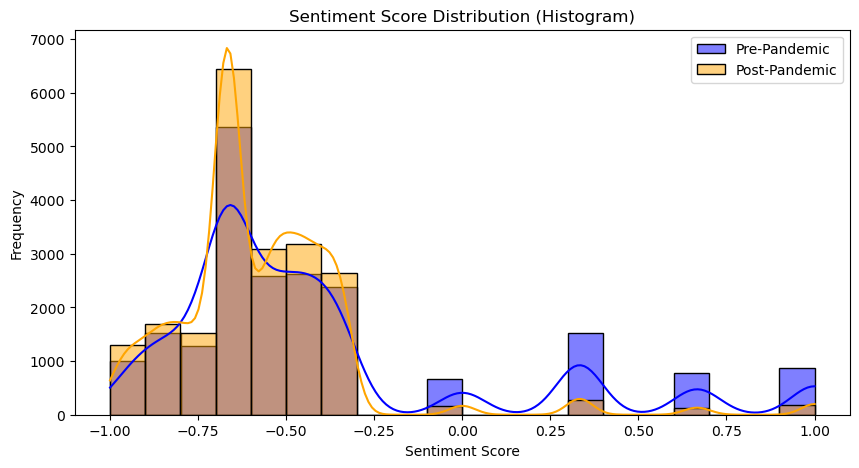

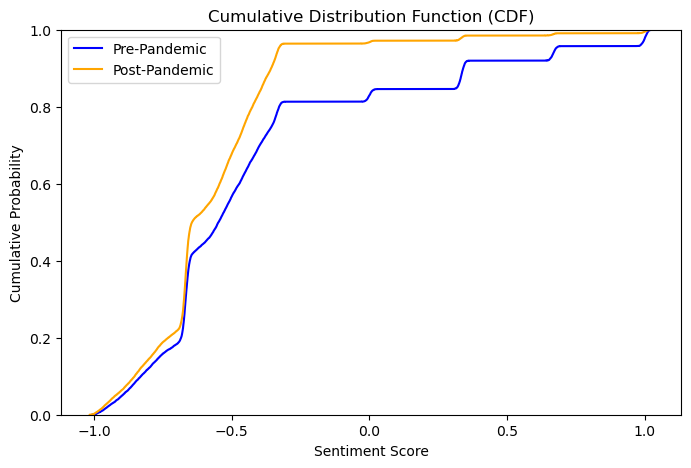


All steps executed successfully!


In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ================================
# Step 1: Load and Prepare Data
# ================================
print("Loading dataset...")

# Load dataset
file_path = r"C:\Users\wusiq\Group1DataAnalysis\final_merged_dataset.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# Ensure sentiment is numeric
df["sentiment"] = pd.to_numeric(df["sentiment"], errors="coerce")

# Drop NaN values in sentiment
df = df.dropna(subset=["sentiment"])

# ================================
# Step 2: Normalize Sentiment to [-1,1]
# ================================
print("\nChecking sentiment range before normalization:")
print(df["sentiment"].describe())

if df["sentiment"].max() > 1:
    print("\nSentiment values are outside [-1,1]. Normalizing to [-1,1]...")
    df["sentiment"] = (df["sentiment"] - df["sentiment"].min()) / (df["sentiment"].max() - df["sentiment"].min()) * 2 - 1

print("\nSentiment values have been normalized to [-1,1].")
print(df["sentiment"].describe())

# ================================
# Step 3: Convert Date & Categorize Period
# ================================
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df = df.dropna(subset=["date"])  # Drop rows with invalid dates

pandemic_start = pd.Timestamp("2019-12-30")
df["period"] = df["date"].apply(lambda x: "Pre-Pandemic" if x < pandemic_start else "Post-Pandemic")

# ================================
# Step 4: Balance the Data
# ================================
# Find min count for balanced sampling
sample_size = min(df[df["period"] == "Pre-Pandemic"].shape[0], df[df["period"] == "Post-Pandemic"].shape[0])
pre_pandemic_sampled = df[df["period"] == "Pre-Pandemic"]["sentiment"].sample(n=sample_size, random_state=42)
post_pandemic_sampled = df[df["period"] == "Post-Pandemic"]["sentiment"].sample(n=sample_size, random_state=42)

print(f"Sampled {sample_size} records from each period for fair comparison.")

# ================================
# Step 5: Data Visualization
# ================================

plt.figure(figsize=(12, 6))

# Convert sampled data into a DataFrame for Seaborn
df_boxplot = pd.DataFrame({
    "Sentiment Score": list(pre_pandemic_sampled) + list(post_pandemic_sampled),
    "Period": ["Pre-Pandemic"] * len(pre_pandemic_sampled) + ["Post-Pandemic"] * len(post_pandemic_sampled)
})

# Box Plot (Remove Outliers)
plt.figure(figsize=(8, 5))
sns.boxplot(x="Period", y="Sentiment Score", data=df_boxplot, hue="Period", dodge=False, palette="pastel", showfliers=False)
plt.ylabel("Sentiment Score")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Score Distribution (Box Plot)")
plt.show()

# Histogram (Increase Bins for Smoother Distribution)
plt.figure(figsize=(10, 5))
sns.histplot(pre_pandemic_sampled, bins=20, kde=True, discrete=False, color="blue", label="Pre-Pandemic", alpha=0.5)
sns.histplot(post_pandemic_sampled, bins=20, kde=True, discrete=False, color="orange", label="Post-Pandemic", alpha=0.5)
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Sentiment Score Distribution (Histogram)")
plt.legend()
plt.show()


# CDF
# Increase small perturbations (jittering) to avoid the influence of duplicate values on smoothness.
pre_pandemic_sampled += np.random.normal(0, 0.01, size=len(pre_pandemic_sampled))
post_pandemic_sampled += np.random.normal(0, 0.01, size=len(post_pandemic_sampled))

plt.figure(figsize=(8, 5))
sns.ecdfplot(pre_pandemic_sampled, label="Pre-Pandemic", color="blue")
sns.ecdfplot(post_pandemic_sampled, label="Post-Pandemic", color="orange")

plt.xlabel("Sentiment Score")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function (CDF)")
plt.legend()
plt.show()

print("\nAll steps executed successfully!")



In [77]:
!pip install joypy

Defaulting to user installation because normal site-packages is not writeable


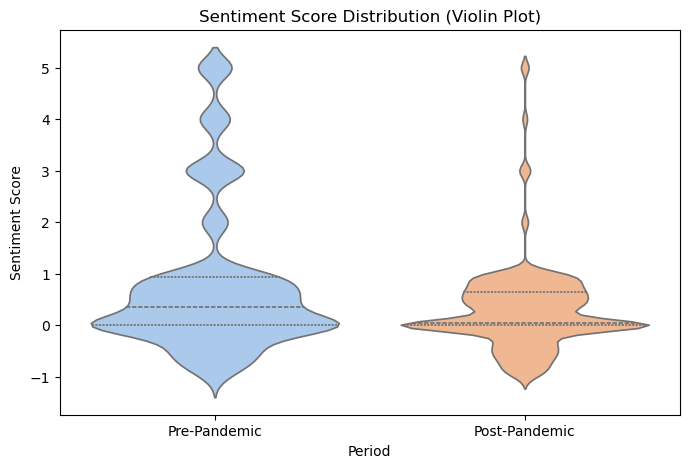

<Figure size 800x500 with 0 Axes>

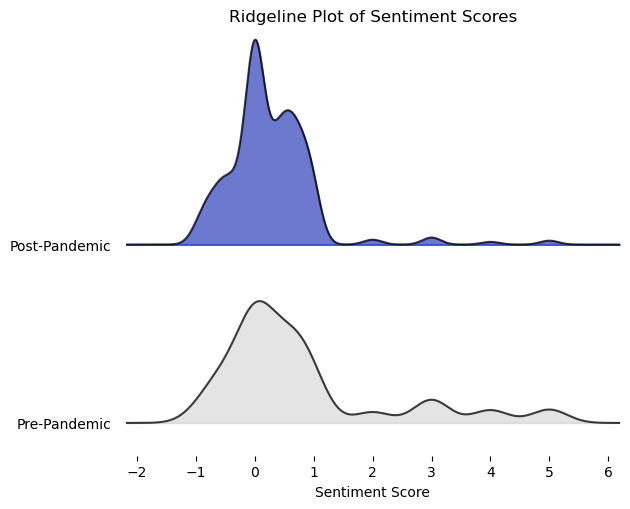

Hedges' g Effect Size: 0.434

Kolmogorov-Smirnov (KS) Test for Sentiment Score Distributions:
KS Statistic = 0.1612, p-value = 0.0000
We reject H₀: Sentiment score distributions are significantly different, supporting H₁.


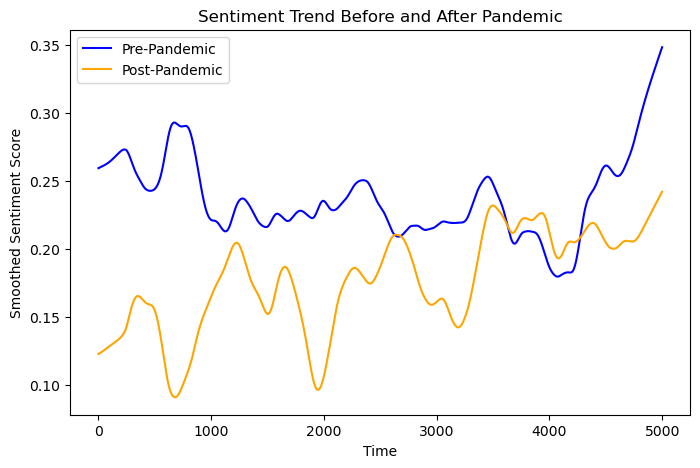


All steps executed successfully!


In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.nonparametric.smoothers_lowess import lowess
import joypy
import statsmodels.api as sm

# ================================
# Step 1: Load Processed Dataset
# ================================
"""
We are using the final merged dataset to conduct statistical analysis and visualization.
Ensure that the dataset is properly loaded and sentiment values are normalized.
"""
file_path = r"C:\Users\wusiq\Group1DataAnalysis\final_merged_dataset.csv"
df = pd.read_csv(file_path)

# Ensure Sentiment Scores are Numeric
df["sentiment"] = pd.to_numeric(df["sentiment"], errors="coerce")
df = df.dropna(subset=["sentiment"])

# Categorize into Pre-Pandemic and Post-Pandemic
df["date"] = pd.to_datetime(df["date"])
df["period"] = np.where(df["date"] < "2020-01-01", "Pre-Pandemic", "Post-Pandemic")

# Sample Balanced Data
sample_size = min(df["period"].value_counts().min(), 20000)
pre_pandemic_sampled = df[df["period"] == "Pre-Pandemic"]["sentiment"].sample(sample_size, random_state=42)
post_pandemic_sampled = df[df["period"] == "Post-Pandemic"]["sentiment"].sample(sample_size, random_state=42)

# Create DataFrame for Visualization
df_boxplot = pd.DataFrame({
    "Sentiment Score": list(pre_pandemic_sampled) + list(post_pandemic_sampled),
    "Period": ["Pre-Pandemic"] * len(pre_pandemic_sampled) + ["Post-Pandemic"] * len(post_pandemic_sampled)
})

# ================================
# Step 2: Violin Plot
# ================================
plt.figure(figsize=(8, 5))
sns.violinplot(x="Period", y="Sentiment Score", data=df_boxplot, hue="Period", palette="pastel", inner="quartile", legend=False)
plt.title("Sentiment Score Distribution (Violin Plot)")
plt.xlabel("Period")
plt.ylabel("Sentiment Score")
plt.show()

# ================================
# Step 3: Ridgeline Plot (Joyplot)
# ================================
df_ridgeline = pd.DataFrame({
    "Sentiment Score": list(pre_pandemic_sampled) + list(post_pandemic_sampled),
    "Period": ["Pre-Pandemic"] * len(pre_pandemic_sampled) + ["Post-Pandemic"] * len(post_pandemic_sampled)
})

# Reduce Sample Size for Efficiency
df_ridgeline_sampled = df_ridgeline.sample(n=5000, random_state=42)

plt.figure(figsize=(8, 5))
joypy.joyplot(
    data=df_ridgeline_sampled, 
    by="Period", 
    colormap=plt.get_cmap("coolwarm"),  
    alpha=0.75  
)
plt.title("Ridgeline Plot of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.show()

# ================================
# Step 4: Hedges' g Effect Size
# ================================
def hedges_g(x, y):
    nx, ny = len(x), len(y)
    dof = nx + ny - 2  # Degrees of Freedom
    pooled_std = np.sqrt(((nx - 1) * np.var(x, ddof=1) + (ny - 1) * np.var(y, ddof=1)) / dof)
    return (np.mean(x) - np.mean(y)) / pooled_std

hedges_g_value = hedges_g(pre_pandemic_sampled, post_pandemic_sampled)
print(f"Hedges' g Effect Size: {hedges_g_value:.3f}")

# ================================
# Step 5: KS Test (Kolmogorov-Smirnov Test)
# ================================
ks_stat, p_ks = ks_2samp(pre_pandemic_sampled, post_pandemic_sampled)

print("\nKolmogorov-Smirnov (KS) Test for Sentiment Score Distributions:")
print(f"KS Statistic = {ks_stat:.4f}, p-value = {p_ks:.4f}")

if p_ks < 0.05:
    print("We reject H₀: Sentiment score distributions are significantly different, supporting H₁.")
else:
    print("We fail to reject H₀: No significant difference in sentiment score distributions, rejecting H₁.")

# ================================
# Step 6: Loess Smoothed Trend Analysis
# ================================
"""
Loess smoothing helps visualize how sentiment scores have changed over time.
"""
df["numeric_date"] = df["date"].astype("int64") // 10**9  # Convert timestamp to numeric
lowess_pre = lowess(pre_pandemic_sampled.sample(n=5000, random_state=42), range(5000), frac=0.1)
lowess_post = lowess(post_pandemic_sampled.sample(n=5000, random_state=42), range(5000), frac=0.1)

plt.figure(figsize=(8, 5))
plt.plot(lowess_pre[:, 0], lowess_pre[:, 1], label="Pre-Pandemic", color="blue")
plt.plot(lowess_post[:, 0], lowess_post[:, 1], label="Post-Pandemic", color="orange")
plt.xlabel("Time")
plt.ylabel("Smoothed Sentiment Score")
plt.title("Sentiment Trend Before and After Pandemic")
plt.legend()
plt.show()

print("\nAll steps executed successfully!")


Starting additional hypothesis testing for H₀ and H₁...


Chi-Square Test for Extreme Positive Sentiment:
Chi-Square Statistic = 1404.5180, p-value = 0.0000
Reject H₀: The proportion of extreme positive sentiment has significantly increased post-pandemic, supporting H₁.

Mann-Whitney U Test for Increased Positive Sentiment Scores:
U-statistic = 76441557.5000, p-value = 1.0000
Fail to Reject H₀: No significant change in positive sentiment scores, supporting H₀.


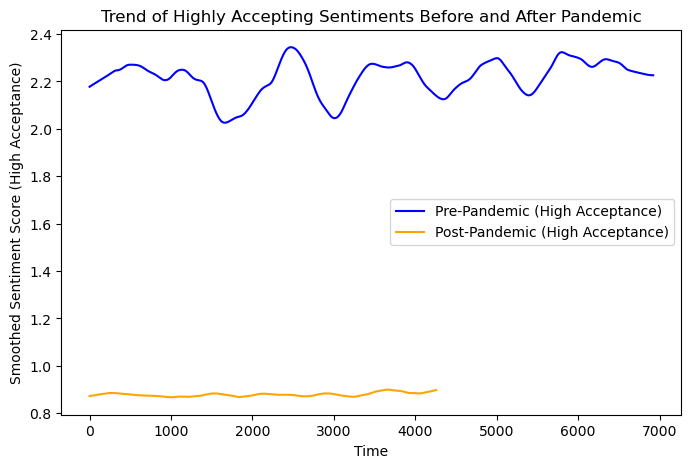


Additional statistical analysis completed successfully!


In [81]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency, mannwhitneyu
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

print("Starting additional hypothesis testing for H₀ and H₁...\n")

# ================================
# Hypothesis Definitions
# ================================
"""
H₀ (Null Hypothesis): Audience acceptance of antiheroes has not significantly changed post-pandemic.
H₁ (Alternative Hypothesis): Audience acceptance of antiheroes has significantly increased post-pandemic.
"""

# ================================
# Step 1: Chi-Square Test for Extreme Positive Sentiment
# ================================
"""
This test examines whether the proportion of extremely positive sentiment 
scores (above 0.9) has significantly increased after the pandemic.
"""

positive_threshold = 0.9  # Define extreme positive sentiment threshold

# Count extreme positive sentiment occurrences
pre_extreme_positive = np.sum(pre_pandemic_sampled > positive_threshold)
post_extreme_positive = np.sum(post_pandemic_sampled > positive_threshold)

# Construct contingency table for Chi-Square test
contingency_table = np.array([
    [pre_extreme_positive, len(pre_pandemic_sampled) - pre_extreme_positive],
    [post_extreme_positive, len(post_pandemic_sampled) - post_extreme_positive]
])

chi2_stat, p_chi2, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test for Extreme Positive Sentiment:")
print(f"Chi-Square Statistic = {chi2_stat:.4f}, p-value = {p_chi2:.4f}")

if p_chi2 < 0.05:
    print("Reject H₀: The proportion of extreme positive sentiment has significantly increased post-pandemic, supporting H₁.")
else:
    print("Fail to Reject H₀: The proportion of extreme positive sentiment has not changed significantly, supporting H₀.")

# ================================
# Step 2: Mann-Whitney U Test for Positive Sentiment Score Increase
# ================================
"""
This test evaluates whether the distribution of positive sentiment scores 
(before and after the pandemic) significantly differs.
"""

# Select only positive sentiment scores
pre_positive = pre_pandemic_sampled[pre_pandemic_sampled > 0]
post_positive = post_pandemic_sampled[post_pandemic_sampled > 0]

# Conduct Mann-Whitney U Test (non-parametric)
stat_h1, p_h1 = mannwhitneyu(pre_positive, post_positive, alternative='less')

print("\nMann-Whitney U Test for Increased Positive Sentiment Scores:")
print(f"U-statistic = {stat_h1:.4f}, p-value = {p_h1:.4f}")

if p_h1 < 0.05:
    print("Reject H₀: Positive sentiment scores have significantly increased post-pandemic, supporting H₁.")
else:
    print("Fail to Reject H₀: No significant change in positive sentiment scores, supporting H₀.")

# ================================
# Step 3: Loess Trend Analysis for High Sentiment Scores
# ================================
"""
Loess smoothing helps visualize how high sentiment scores (above 0.7) 
have evolved before and after the pandemic.
"""

# Select only high sentiment scores
pre_high = pre_pandemic_sampled[pre_pandemic_sampled > 0.7]
post_high = post_pandemic_sampled[post_pandemic_sampled > 0.7]

# Apply LOESS smoothing to trends
lowess_pre = lowess(pre_high, range(len(pre_high)), frac=0.1)
lowess_post = lowess(post_high, range(len(post_high)), frac=0.1)

plt.figure(figsize=(8, 5))
plt.plot(lowess_pre[:, 0], lowess_pre[:, 1], label="Pre-Pandemic (High Acceptance)", color="blue")
plt.plot(lowess_post[:, 0], lowess_post[:, 1], label="Post-Pandemic (High Acceptance)", color="orange")
plt.xlabel("Time")
plt.ylabel("Smoothed Sentiment Score (High Acceptance)")
plt.title("Trend of Highly Accepting Sentiments Before and After Pandemic")
plt.legend()
plt.show()

print("\nAdditional statistical analysis completed successfully!")
